In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We have no null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

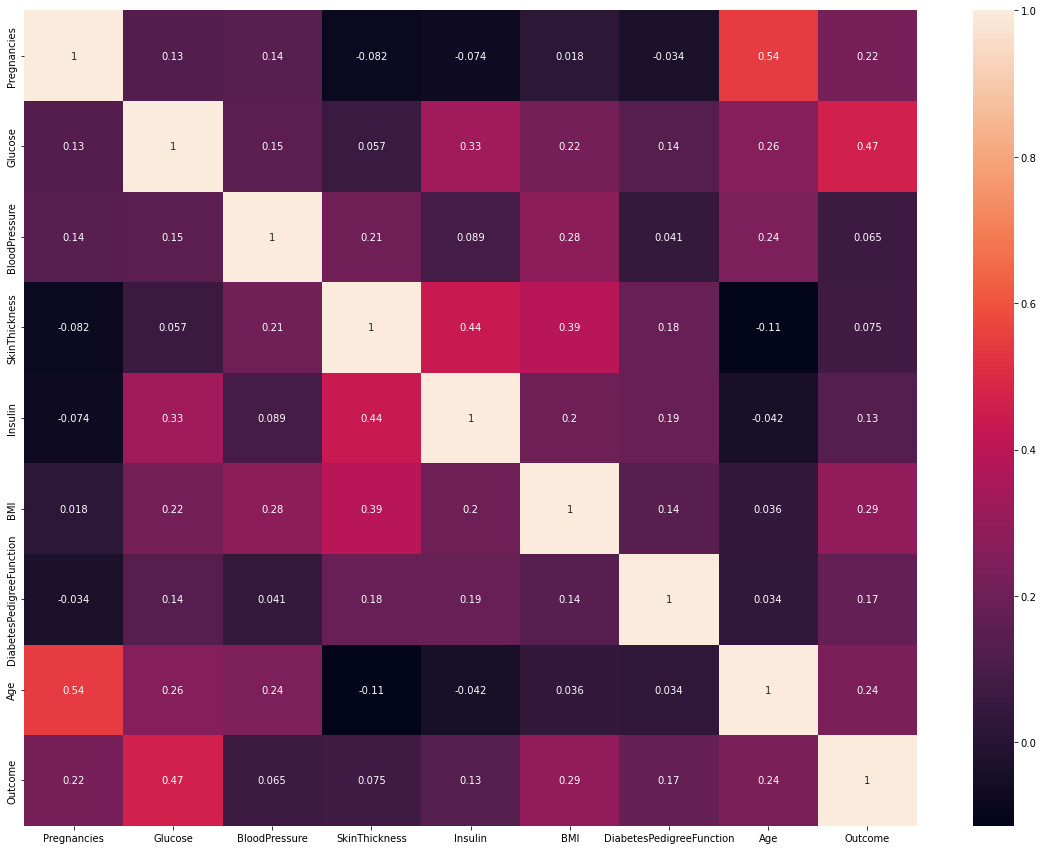

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

BloodPressure and SkinThickness has almost no impact on outcome so we may drop them. I already tried it and it didn't change the models's score that much so i will leave it this way.

In [9]:
X = data.drop("Outcome",axis="columns")
y = data["Outcome"]

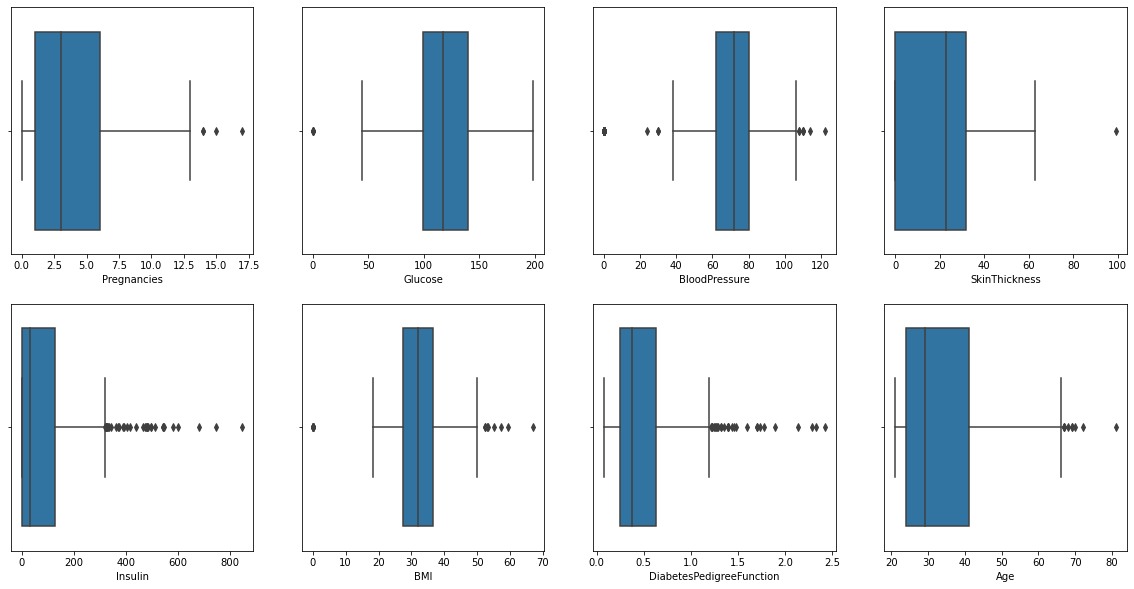

In [10]:
def plot_boxplot(data,rows,columns):
    """ Plots all features """
    lst_num_column = []
    for column in data.columns:
        if(data[column].dtype != "object"):
            lst_num_column.append(column)
    count = 0
    fig, axs = plt.subplots(rows, columns, figsize=(columns*5,rows*5))
    for i in range(rows):
        for j in range(columns):
            sns.boxplot(ax= axs[i, j], data=data, x=lst_num_column[count])
            count += 1
plot_boxplot(X,2,4)

Almost all of or features have some outliers. We can suppres them with winsorization

In [11]:
from scipy.stats.mstats import winsorize

In [12]:
for col in X.columns:
    X[col] = winsorize(X[col],(0.05,0.05))

We updated our data set now we don't have any outliers. But it also didn't change the models's score.

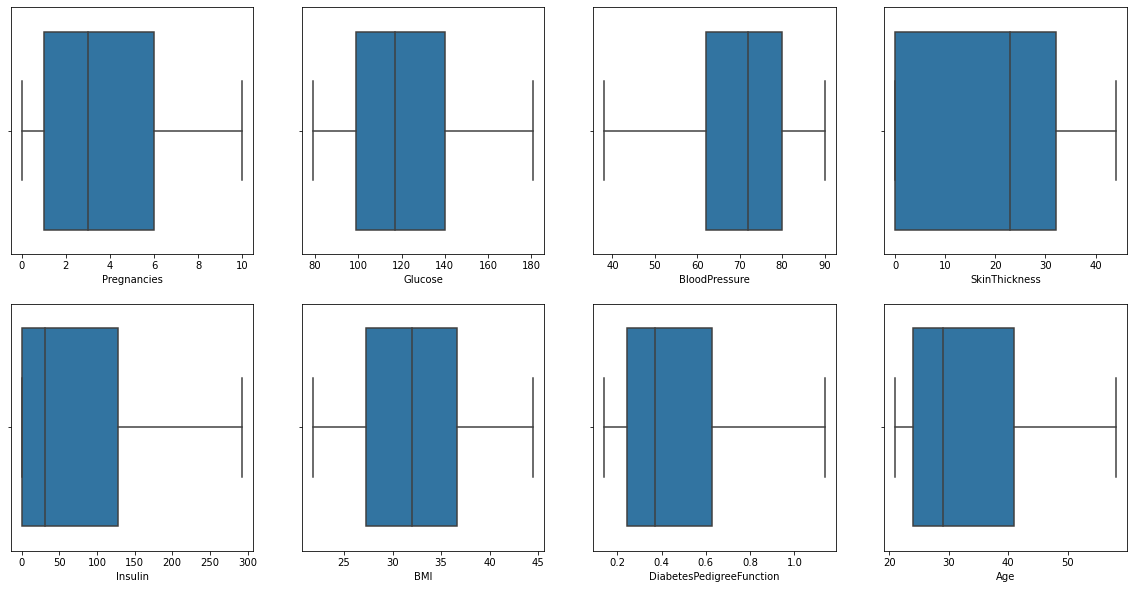

In [13]:
plot_boxplot(X,2,4)

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

C:\Users\FURKANSALMAN\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [16]:
Models = {"LogisticRegression":LogisticRegression(max_iter=200),"RandomForestClassifier":RandomForestClassifier(n_estimators=350),"XGBClassifier":XGBClassifier(),"CatBoostClassifier":CatBoostClassifier(silent=True)}
for name , model in Models.items():
    model.fit(X_train,y_train)
    print("Model : ",name)
    print("Score : ",model.score(X_test,y_test))

Model :  LogisticRegression
Score :  0.7965367965367965
Model :  RandomForestClassifier
Score :  0.7792207792207793
[18:07:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\FURKANSALMAN\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\FURKANSALMAN\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model :  XGBClassifier
Score :  0.7662337662337663
Model :  CatBoostClassifier
Score :  0.7575757575757576
